In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy.stats import gaussian_kde

from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,QuantileTransformer,PowerTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,mean_absolute_percentage_error,f1_score,accuracy_score
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

from category_encoders import TargetEncoder
from sklearn.linear_model import ElasticNet, Ridge, Lasso, Lars,SGDRegressor,LogisticRegression
from sklearn.svm import SVR,SVC

from sklearn.ensemble import VotingRegressor,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor


from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector
import shap

import pickle

In [2]:
path_train = 'train_house_A.csv'

In [3]:
df = pd.read_csv(path_train)
display(df.shape)
display(df.head())
df.describe()

(408, 30)

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322


,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,...,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,...,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,...,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,...,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,...,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,...,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,...,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


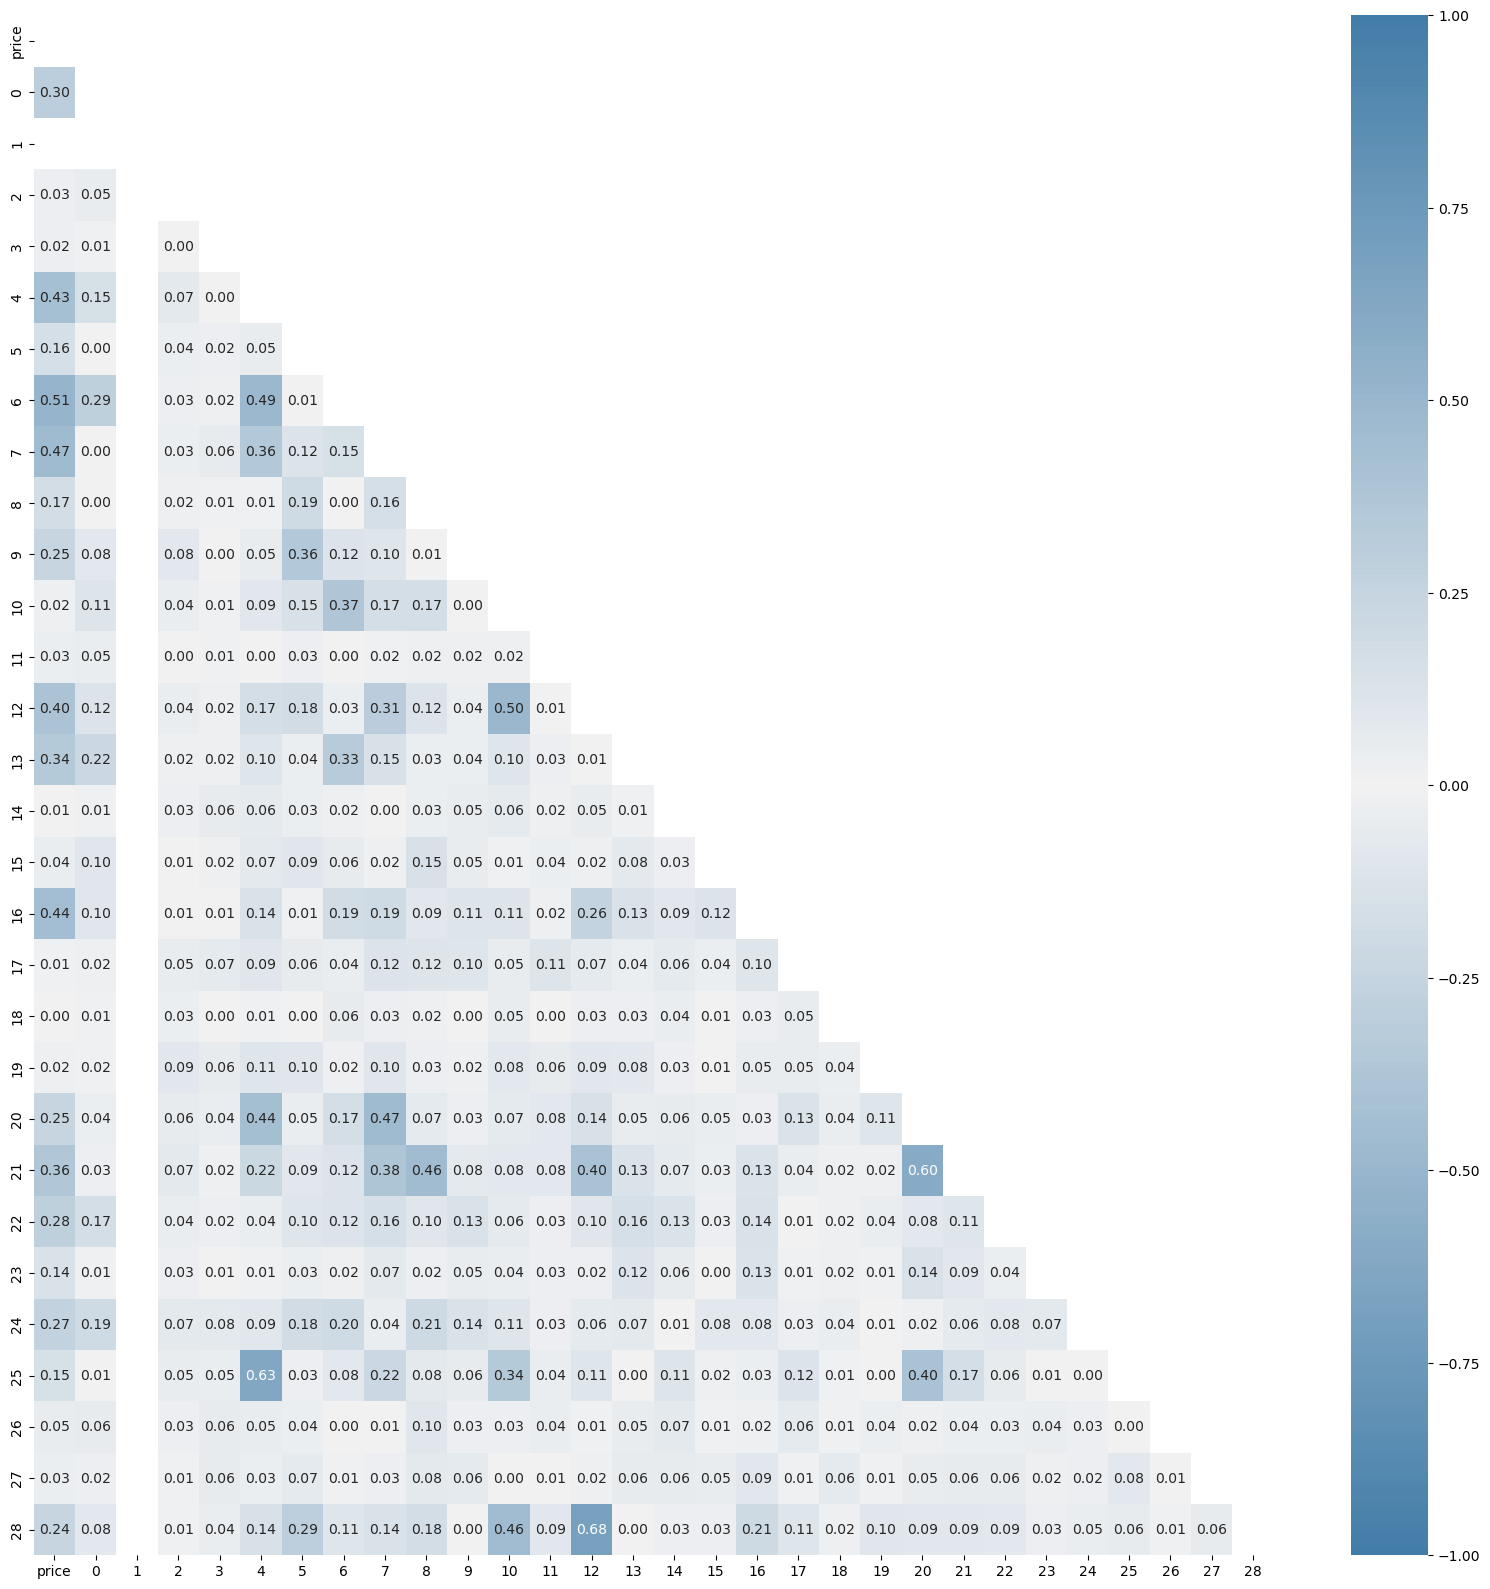

In [4]:
plt.figure(figsize=(20,20))

corr_matrix = df.corr().abs()
mask = np.tril(corr_matrix, k = -1).astype(bool)


mymap = sns.diverging_palette(240, 240, as_cmap = True)


sns.heatmap(corr_matrix.where(mask), vmin = -1, vmax = 1,
            annot=True, fmt='.2f', center=0, cmap=mymap);

In [15]:
threshold = 0.3
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print("Признаки с высокой корреляцией:", highly_correlated_features)
len(highly_correlated_features)

Признаки с высокой корреляцией: ['0', '4', '6', '7', '9', '10', '12', '13', '16', '20', '21', '25', '28']


13

In [419]:
X = df.drop(columns=['price'])
y = (df.price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42 )

In [420]:
selected_features = ['0', '4', '6', '7', '9', '10', '12', '13', '16', '20', '21', '25', '28']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [421]:
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_features)],
      
    remainder='drop'  
).set_output(transform="pandas")

display(ct)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['0', '4', '6', '7', '9', '10', '12', '13',
                                  '16', '20', '21', '25', '28'])])

In [422]:
model_baseline_1 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',ct),
                        ('estimator',RandomForestRegressor(n_estimators =500,
                                                              min_samples_split=5,
                                                               n_jobs = -1,
                                                            max_depth = 2,
                                                               random_state=42))
                        ]),
    transformer =PowerTransformer() #QuantileTransformer(n_quantiles = 491 , output_distribution = 'normal') #PowerTransformer()
)



model_baseline_1.fit(X_train_selected,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['0',
                                                                                        '4',
                                                                                        '6',
                                                                                        '7',
                                                                                        '9',
                                                                                        '10',
                                                                                        '12',
                                                                                        '13',
                                                                                        '16',
                                                                                        '20',
                                                                                        '21',
                                                                                        '25',
                                                                                        '28'])])),
                                                     ('estimator',
                                                      RandomForestRegressor(max_depth=2,
                                                                            min_samples_split=5,
                                                                            n_estimators=500,
                                                                            n_jobs=-1,
                                                                            random_state=42))]),
                           transformer=PowerTransformer())

In [423]:
y_pred_test1 = model_baseline_1.predict(X_test)
mape_test1 = mean_absolute_percentage_error(y_test, y_pred_test1)
print(f'MAPE_TEST: {mape_test1}')

y_pred_train1 = model_baseline_1.predict(X_train)
mape_train1 = mean_absolute_percentage_error(y_train, y_pred_train1)
print(f'MAPE_TRAIN: {mape_train1}')

MAPE_TEST: 0.2293808496257044
MAPE_TRAIN: 0.18838519678680574


In [424]:
data = ct.fit_transform(X_train)
data

,num__0,num__4,num__6,num__7,num__9,num__10,num__12,num__13,num__16,num__20,num__21,num__25,num__28
79,0.435087,-0.216370,-0.151535,-0.56114,-0.440698,-0.046433,-0.875621,-0.749929,-0.656272,-0.209041,-1.277625,-0.178237,-0.1066
290,0.435087,-0.216370,0.346261,-0.56114,-0.440698,-0.557237,-0.875621,1.593092,-0.656272,-0.209041,-1.277625,-0.981045,-0.1066
227,0.435087,1.177653,0.424618,1.66036,2.269127,0.024512,0.295928,0.421582,-0.656272,-0.209041,0.176051,-0.066736,-0.1066
305,0.435087,-0.216370,-0.515663,-0.56114,-0.440698,0.024512,0.295928,-0.749929,-0.656272,-0.209041,0.176051,-0.066736,-0.1066
158,0.435087,-0.216370,-0.883479,-0.56114,-0.440698,0.024512,0.295928,0.421582,1.523758,-0.209041,0.176051,-0.066736,-0.1066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.435087,-1.182228,-0.667768,1.66036,-0.440698,0.024512,0.295928,1.593092,-0.656272,-0.209041,0.176051,-0.066736,-0.1066
106,0.435087,-0.315943,-0.266765,1.66036,-0.440698,0.024512,0.295928,1.593092,-0.656272,2.536996,1.629726,-0.141070,-0.1066
270,0.435087,-0.216370,0.424618,-0.56114,-0.440698,0.024512,0.295928,1.593092,-0.656272,-0.209041,1.629726,0.973940,-0.1066
348,0.435087,-0.216370,-0.736906,-0.56114,-0.440698,0.554235,-0.875621,-0.749929,-0.656272,-0.209041,-1.277625,0.765805,-0.1066


In [425]:
forest = RandomForestRegressor(n_estimators =500,
                                                              min_samples_split=5,
                                                               n_jobs = -1,
                                                            max_depth = 5,
                                                               random_state=42)
forest.fit(data,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=500,
                      n_jobs=-1, random_state=42)

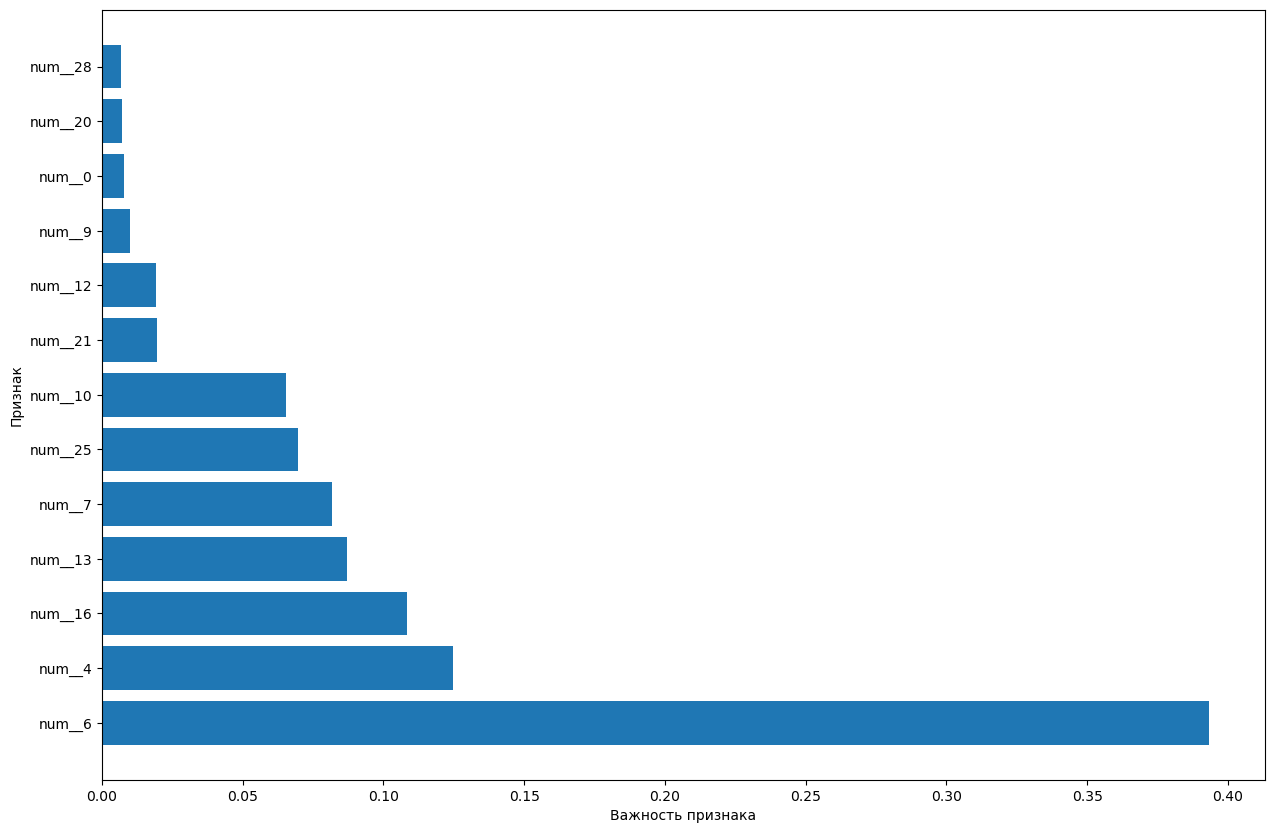

Топ 13 важных признаков:
1. num__6 (важность: 0.3933)
2. num__4 (важность: 0.1247)
3. num__16 (важность: 0.1082)
4. num__13 (важность: 0.0871)
5. num__7 (важность: 0.0816)
6. num__25 (важность: 0.0696)
7. num__10 (важность: 0.0653)
8. num__21 (важность: 0.0195)
9. num__12 (важность: 0.0193)
10. num__9 (важность: 0.0100)
11. num__0 (важность: 0.0076)
12. num__20 (важность: 0.0070)
13. num__28 (важность: 0.0066)


In [426]:
def plot_feature_importances_cancer(model, data, top_n=20):
    n_features = data.shape[1]
    indices = np.argsort(model.feature_importances_)[::-1]
    sorted_importances = model.feature_importances_[indices]
    sorted_features = data.columns[indices]
    plt.figure(figsize=(15, 10))
    plt.barh(range(n_features), sorted_importances, align='center')
    plt.yticks(np.arange(n_features), sorted_features)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.show()
    print(f"Топ {top_n} важных признаков:")
    for i in range(top_n):
        print(f"{i + 1}. {sorted_features[i]} (важность: {sorted_importances[i]:.4f})")

plot_feature_importances_cancer(forest, data, top_n=13)


In [427]:
selected_features2 = [ '6', '7', '4', '16', '13', '25' , '10', '21','12']
X_train_selected2 = X_train[selected_features2]
X_test_selected2 = X_test[selected_features2]

In [428]:
ct_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_features2)],
      
    remainder='drop'  
).set_output(transform="pandas")

display(ct)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['0', '4', '6', '7', '9', '10', '12', '13',
                                  '16', '20', '21', '25', '28'])])

In [429]:
model_baseline_2 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',ct_new),
                        ('estimator',GradientBoostingRegressor(n_estimators =500 ,
                                                               learning_rate = 0.01,
                                                               max_depth = 3 ,
                                                               min_samples_split = 4,
                                                               subsample = 0.09,
                                                              random_state=42))]),
                                                               
#                         ]),
    transformer =PowerTransformer() #QuantileTransformer(n_quantiles = 491 , output_distribution = 'normal') #PowerTransformer()
)



model_baseline_2.fit(X_train_selected2,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['6',
                                                                                        '7',
                                                                                        '4',
                                                                                        '16',
                                                                                        '13',
                                                                                        '25',
                                                                                        '10',
                                                                                        '21',
                                                                                        '12'])])),
                                                     ('estimator',
                                                      GradientBoostingRegressor(learning_rate=0.01,
                                                                                min_samples_split=4,
                                                                                n_estimators=500,
                                                                                random_state=42,
                                                                                subsample=0.09))]),
                           transformer=PowerTransformer())

In [430]:
y_pred_test2 = model_baseline_2.predict(X_test)
mape_test2 = mean_absolute_percentage_error(y_test, y_pred_test2)
print(f'MAPE_TEST: {mape_test2}')

y_pred_train2 = model_baseline_2.predict(X_train)
mape_train2 = mean_absolute_percentage_error(y_train, y_pred_train2)
print(f'MAPE_TRAIN: {mape_train2}')

MAPE_TEST: 0.21769979762939176
MAPE_TRAIN: 0.15050419356440148


In [431]:
model_baseline_3 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',ct_new),
                        ('estimator',SVR(kernel = 'rbf',C =0.1))
                        ]),
    transformer =PowerTransformer() #QuantileTransformer(n_quantiles = 491 , output_distribution = 'normal') #PowerTransformer()
)



model_baseline_3.fit(X_train_selected2,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['6',
                                                                                        '7',
                                                                                        '4',
                                                                                        '16',
                                                                                        '13',
                                                                                        '25',
                                                                                        '10',
                                                                                        '21',
                                                                                        '12'])])),
                                                     ('estimator',
                                                      SVR(C=0.1))]),
                           transformer=PowerTransformer())

In [432]:
y_pred_test3 = model_baseline_3.predict(X_test)
mape_test3 = mean_absolute_percentage_error(y_test, y_pred_test3)
print(f'MAPE_TEST: {mape_test3}')

y_pred_train3 = model_baseline_3.predict(X_train)
mape_train3 = mean_absolute_percentage_error(y_train, y_pred_train3)
print(f'MAPE_TRAIN: {mape_train3}')

MAPE_TEST: 0.22468797880191904
MAPE_TRAIN: 0.1775211103850505


In [433]:

model_baseline_4 = Pipeline(steps = [
                          ('preproc',ct_new),
                        ('estimator',Lasso(alpha = 1))
                        ])

model_baseline_4.fit(X_train_selected2,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['6', '7', '4', '16', '13',
                                                   '25', '10', '21', '12'])])),
                ('estimator', Lasso(alpha=1))])

In [434]:
y_pred_test4 = model_baseline_4.predict(X_test)
mape_test4= mean_absolute_percentage_error(y_test, y_pred_test4)
print(f'MAPE_TEST: {mape_test4}')

y_pred_train4 = model_baseline_4.predict(X_train)
mape_train4 = mean_absolute_percentage_error(y_train, y_pred_train4)
print(f'MAPE_TRAIN: {mape_train4}')

MAPE_TEST: 0.21727772270055734
MAPE_TRAIN: 0.1838465713630162


In [435]:
model_baseline_1 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',ct_new),
                        ('estimator',RandomForestRegressor(n_estimators =600,
                                                              min_samples_split=7,
                                                               n_jobs = -1,
                                                            max_depth = 4,
                                                     
                                                               random_state=42))
                        ]),
    transformer =PowerTransformer() #QuantileTransformer(n_quantiles = 491 , output_distribution = 'normal') #PowerTransformer()
)



model_baseline_1.fit(X_train_selected2,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['6',
                                                                                        '7',
                                                                                        '4',
                                                                                        '16',
                                                                                        '13',
                                                                                        '25',
                                                                                        '10',
                                                                                        '21',
                                                                                        '12'])])),
                                                     ('estimator',
                                                      RandomForestRegressor(max_depth=4,
                                                                            min_samples_split=7,
                                                                            n_estimators=600,
                                                                            n_jobs=-1,
                                                                            random_state=42))]),
                           transformer=PowerTransformer())

In [436]:
y_pred_test1 = model_baseline_1.predict(X_test)
mape_test1 = mean_absolute_percentage_error(y_test, y_pred_test1)
print(f'MAPE_TEST: {mape_test1}')

y_pred_train1 = model_baseline_1.predict(X_train)
mape_train1 = mean_absolute_percentage_error(y_train, y_pred_train1)
print(f'MAPE_TRAIN: {mape_train1}')

MAPE_TEST: 0.22024773416907387
MAPE_TRAIN: 0.15219663891044774


## SHAP

In [172]:
ct_new.set_output(transform="pandas")
ct_new.fit(X_train)
X_train_ct = ct_new.transform(X_train)

In [173]:
model_baseline_2 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                            #('preproc',ct),
                            ('estimator',GradientBoostingRegressor(n_estimators =491 ,
                                                               learning_rate = 0.0096,
                                                               max_depth = 3 ,
                                                               min_samples_split =3 ,
                                                               subsample = 0.02,
                                                              random_state=42))]),
    
    transformer =  PowerTransformer()#QuantileTransformer(n_quantiles = 1000 , output_distribution = 'normal')
)

model_baseline_2.fit(X_train_ct,y_train)



TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                      GradientBoostingRegressor(learning_rate=0.0096,
                                                                                min_samples_split=3,
                                                                                n_estimators=491,
                                                                                random_state=42,
                                                                                subsample=0.02))]),
                           transformer=PowerTransformer())

In [174]:
explainer = shap.Explainer(model_baseline_2.predict, X_train_ct)
shap_values = explainer(X_train_ct)

ExactExplainer explainer: 245it [00:13,  5.31it/s]                              


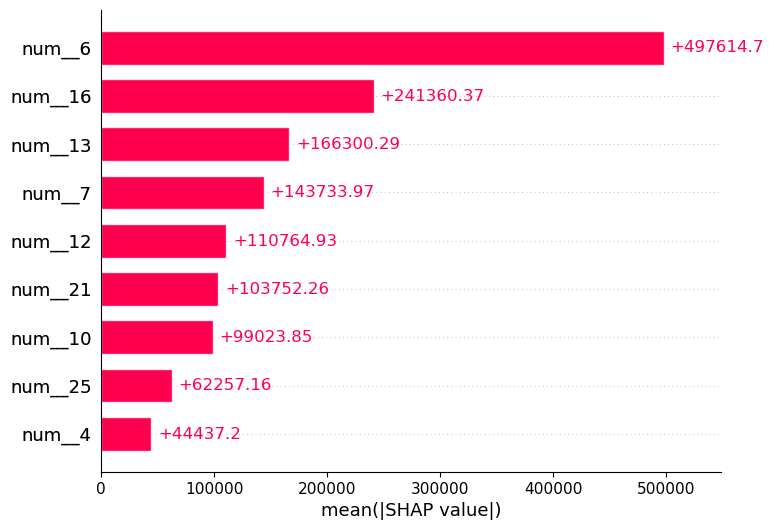

In [175]:
shap.plots.bar(shap_values.abs.mean(0))